### **Section 4: Implementation Steps for TurtleBot3 Simulation and Odometry**

This section provides a detailed implementation plan based on the lab sheet for setting up and running the TurtleBot3 simulation in Gazebo, operating the robot, and publishing odometry data.

---

### **Step 1: Install Prerequisite Packages**

1. **Navigate to the Workspace Source Directory**:
   ```bash
   $ cd ~/catkin_ws/src
   ```

2. **Clone and Install the Required Packages**:
   - Install `turtlebot3` and `turtlebot3_msgs`:
     ```bash
     $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3_msgs.git
     $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3.git
     ```

3. **Compile the Workspace**:
   - Go back to the root of your workspace and compile:
     ```bash
     $ cd ~/catkin_ws
     $ catkin_make
     ```

---

### **Step 2: Install and Run the TurtleBot3 Simulation**

1. **Install the Simulation Package**:
   - Clone the simulation package repository:
     ```bash
     $ cd ~/catkin_ws/src/
     $ git clone -b noetic-devel https://github.com/ROBOTIS-GIT/turtlebot3_simulations.git
     ```
   - Compile the workspace again:
     ```bash
     $ cd ~/catkin_ws
     $ catkin_make
     ```

2. **Set the TurtleBot3 Model**:
   - Define the robot model as an environment variable:
     ```bash
     $ export TURTLEBOT3_MODEL=burger
     ```

3. **Launch the Simulation**:
   - Start the simulation in an empty Gazebo world:
     ```bash
     $ roslaunch turtlebot3_gazebo turtlebot3_empty_world.launch
     ```



4. **Alternative Worlds**:
   - For the TurtleBot3 World:
     ```bash
     $ export TURTLEBOT3_MODEL=waffle
     $ roslaunch turtlebot3_gazebo turtlebot3_world.launch
     ```


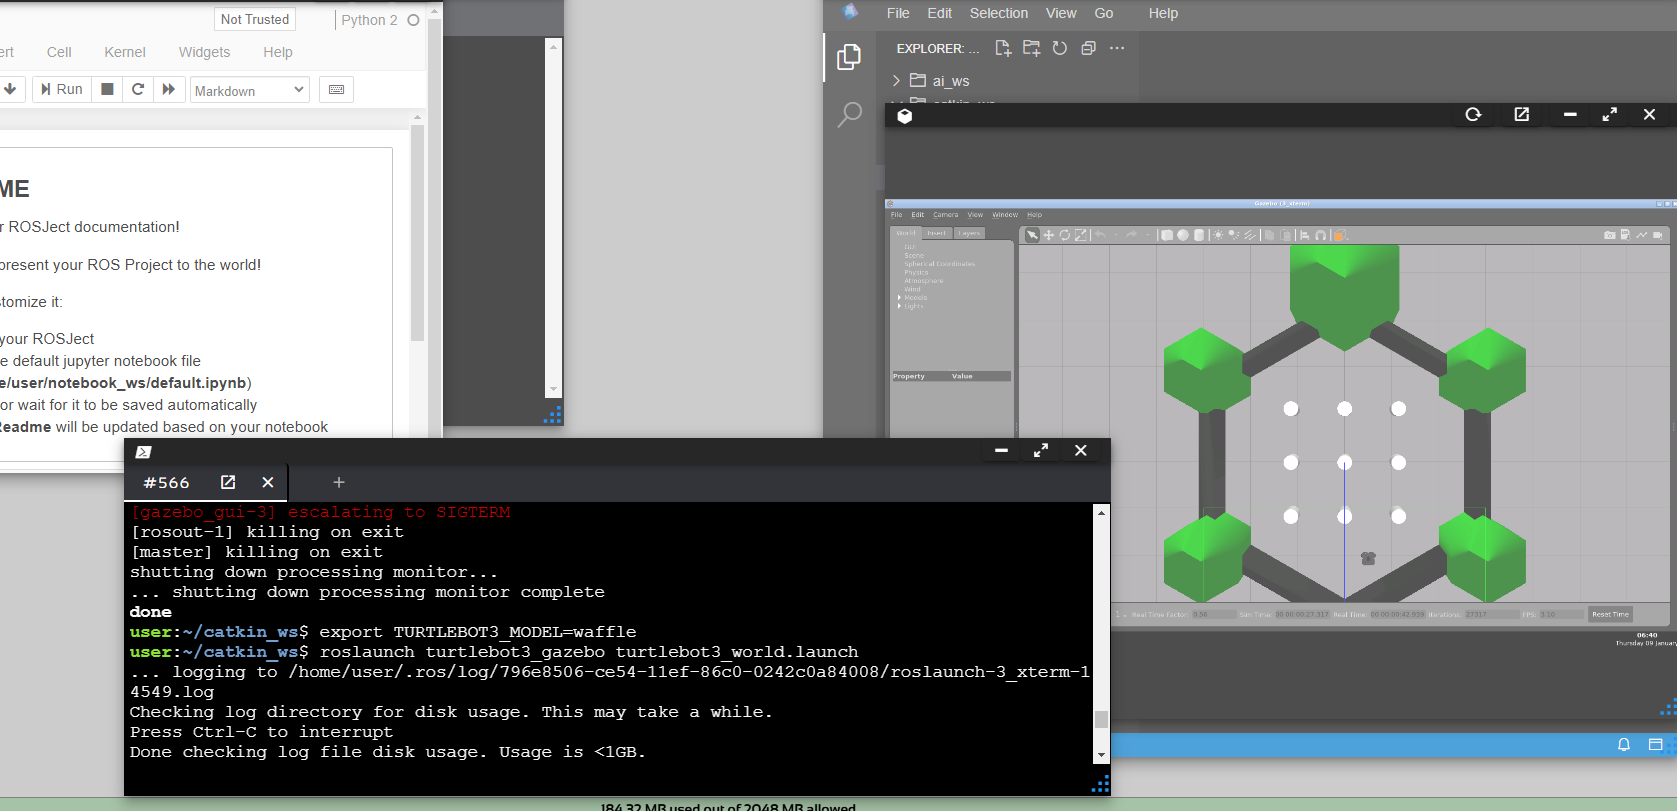

   - For the TurtleBot3 House:
     ```bash
     $ export TURTLEBOT3_MODEL=waffle_pi
     $ roslaunch turtlebot3_gazebo turtlebot3_house.launch
     ```

---


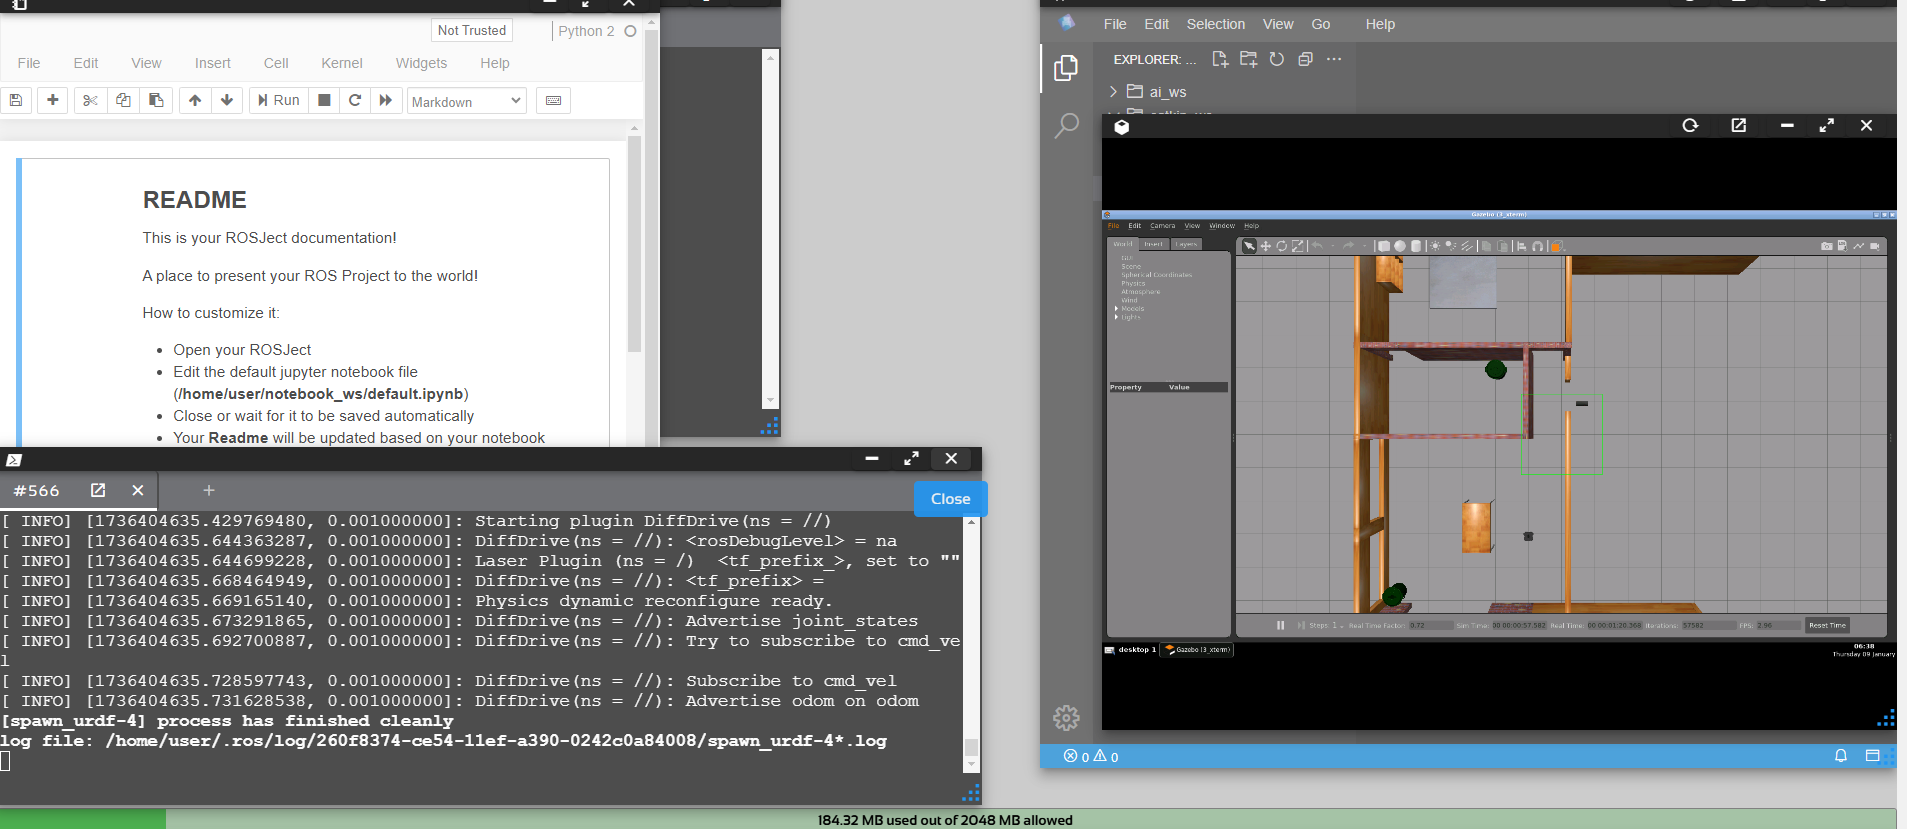


### **Step 3: Operate the TurtleBot3 Using Keyboard**

1. **Launch Keyboard Teleoperation**:
   - Open a new terminal and run:
     ```bash
     $ export TURTLEBOT3_MODEL=burger
     $ roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch
     ```
2. **Control the Robot**:
   - Use the keyboard to move the TurtleBot3 around the simulated environment.

---
(Make sure to select the cmd window to make it work)

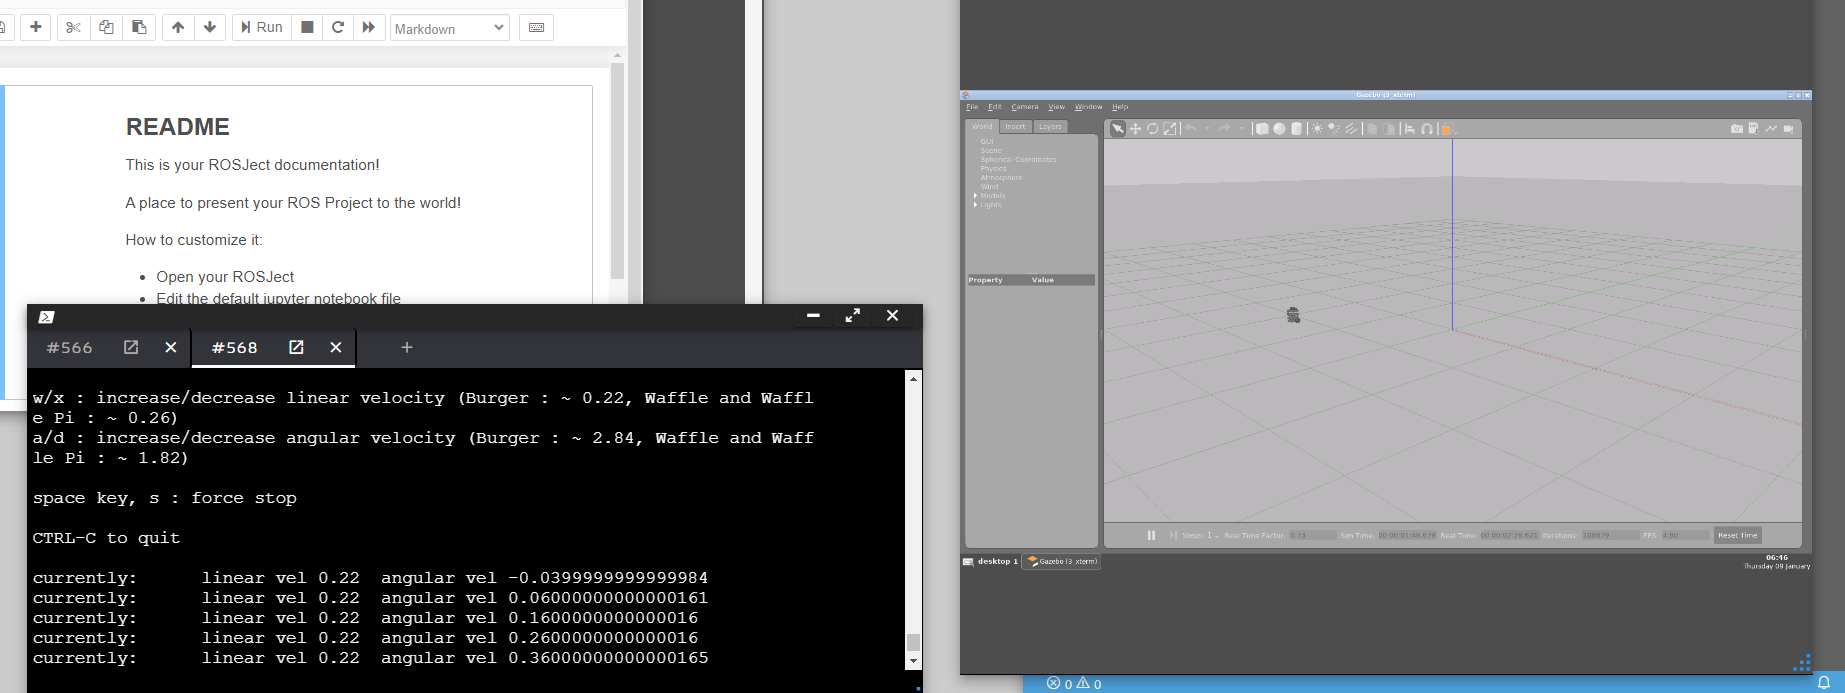


### **Step 4: Write a Launch File for a Custom Package**

1. **Create a New Package**:
   - Create a package named `my_odom_publisher`:
     ```bash
     $ cd ~/catkin_ws/src
     $ catkin_create_pkg my_odom_publisher rospy std_msgs
     ```

2. **Add a Launch Directory**:
   - Navigate to the package and create a `launch` folder:
     ```bash
     $ cd ~/catkin_ws/src/my_odom_publisher
     $ mkdir launch
     ```

3. **Create a Launch File**:
   - Inside the `launch` folder, create a file named `start_odom.launch`:
     ```bash
     $ touch launch/start_odom.launch
     ```

4. **Define the Node in the Launch File**:
   - Edit `start_odom.launch` to include:
     ```xml
     <launch>
         <node name="odom_node" pkg="my_odom_publisher" type="odom.py" output="screen"/>
     </launch>
     ```

---


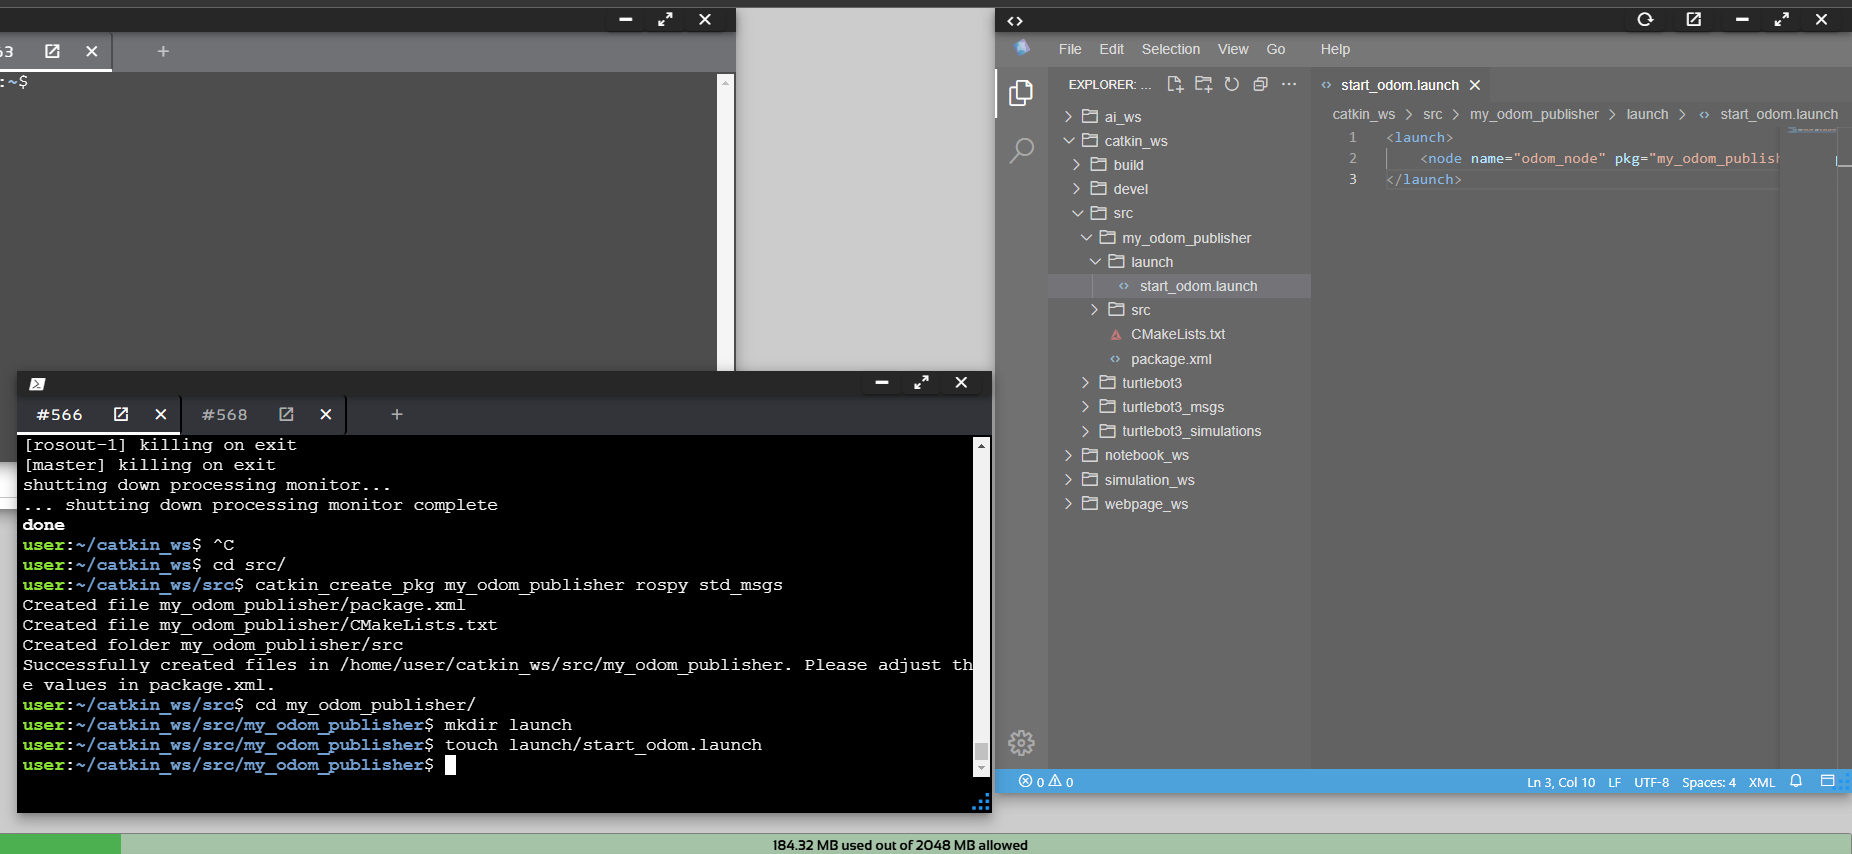


### **Step 5: Write the Python Code for Odometry Data**

1. **Create a Subscriber Node**:
   - In the `src` folder of your package, create `odom.py`:
     ```bash
     $ cd ~/catkin_ws/src/my_odom_publisher/src
     $ touch odom.py
     ```

   - Add the following code to `odom.py`:
     ```python
     #!/usr/bin/env python
     import rospy
     from nav_msgs.msg import Odometry

     def callback(data):
         rospy.loginfo("Odometry Data: %s", data)

     def odom_listener():
         rospy.init_node('odom_listener', anonymous=True)
         rospy.Subscriber("/odom", Odometry, callback)
         rospy.spin()

     if __name__ == '__main__':
         try:
             odom_listener()
         except rospy.ROSInterruptException:
             pass
     ```

2. **Make the Script Executable**:
   ```bash
   $ chmod +x odom.py
   ```

3. **Launch the Node**:
   - Run the launch file:
     ```bash
     $ roslaunch my_odom_publisher start_odom.launch
     ```

---



### **Step 6: Create a New Topic and Publish Custom Odometry Data**

1. **Write a Node to Subscribe and Publish**:
   - Create another Python script in `src` named `custom_odom.py`:
     ```bash
     $ touch custom_odom.py
     ```

   - Add the following code:
     ```python
     #!/usr/bin/env python
     import rospy
     from nav_msgs.msg import Odometry
     from std_msgs.msg import String

     def callback(data):
         custom_msg = "Custom Odometry Data: Position (%f, %f, %f)" % (
             data.pose.pose.position.x,
             data.pose.pose.position.y,
             data.pose.pose.position.z
         )
         rospy.loginfo(custom_msg)
         custom_pub.publish(custom_msg)

     def custom_odom_node():
         global custom_pub
         rospy.init_node('custom_odom_node', anonymous=True)
         rospy.Subscriber("/odom", Odometry, callback)
         custom_pub = rospy.Publisher('/my_odom', String, queue_size=10)
         rospy.spin()

     if __name__ == '__main__':
         try:
             custom_odom_node()
         except rospy.ROSInterruptException:
             pass
     ```

2. **Make the Script Executable**:
   ```bash
   $ chmod +x custom_odom.py
   ```

3. **Update the Launch File**:
   - Add the new node to `start_odom.launch`:
     ```xml
     <launch>
         <node name="odom_node" pkg="my_odom_publisher" type="odom.py" output="screen"/>
         <node name="custom_odom_node" pkg="my_odom_publisher" type="custom_odom.py" output="screen"/>
     </launch>
     ```

4. **Launch the Package**:
   - Run the updated launch file:
     ```bash
     $ roslaunch my_odom_publisher start_odom.launch
     ```

---



### **Step 7: Verify and Test**

1. **Check Active Topics**:
   - Run:
     ```bash
     $ rostopic list
     ```

2. **View the New Topic**:
   - Check the custom odometry data on the `/my_odom` topic:
     ```bash
     $ rostopic echo /my_odom
     ```

3. **Test Both Nodes**:
   - Ensure that `/odom` is being subscribed to and `/my_odom` is being published correctly.

---

This completes the implementation steps for setting up the TurtleBot3 simulation, writing custom nodes, and publishing odometry data in a new topic. Let me know if you'd like further clarification or additional sections.